<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/PROYECTO/Project_Raiza/Project_HeartDisease_Raiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio 

La Base de datos escogida muestra los resultados de los exámenes de sangre de diferentes pacientes.  El objetivo es con base a éstos resultados, detectar si determinado paciente podría llegar a padecer una cardiopatía.

Los rangos van desde 0 (sin riesgo) a 4.

In [4]:
import pandas as pd
cora = pd.read_csv('/content/drive/My Drive/heart.csv')
cora.head ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
cora.shape

(303, 14)

In [0]:
cora.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

En donde: sex: (1 = male, 0 = female)

cp: si experimenta dolor de pecho (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: presión arterial en reposo (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: ritmo cardíaco máximo

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment (Value 1: ascending, Value 2: flat, Value 3: descending)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [0]:
cora.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Tengo 13 variables númericas íntegras y 1 float. Paso a cambiarla a íntegra y cambio los valores de la columna Sexo y Target a su categoría correspondiente.

In [0]:
cora['oldpeak'] = cora['oldpeak'].astype (int)
cora.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [0]:
cora['sex'].unique ()

array([1, 0])

In [0]:
cora['sex'] = cora.sex.replace([0,1],['Female','Male'])
cora.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,Sí
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,Sí
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,Sí
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,Sí
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,Sí


In [0]:
cora['target'].unique ()

array([1, 0])

In [0]:
cora['target'] = cora.target.replace([1,0],['Sí','No'])
cora.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Sí
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,Sí
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,Sí
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,Sí
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,Sí


Checo si hay NaNs

In [0]:
cora.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

En promedio, la base de datos contiene observaciones 303 en pacientes, con una media de edad de 54 años, siendo 29 años la edad del paciente más joven y 77 el más viejo.

Claramente se ve que los rangos de riesgo en los distintos resultados van incrementando a mayor edad.

In [0]:
cora.describe ()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.765677,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.070933,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000


In [0]:
cora.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
sex,,,,,,,,,,,,
Female,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.625000,1.427083,0.552083,2.125000
Male,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,0.830918,1.386473,0.811594,2.400966


Representar gráficamente la distribución de las variables numéricas en forma de histograma y de diagrama de dispersión multidimensional (pairplot) y en barras.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


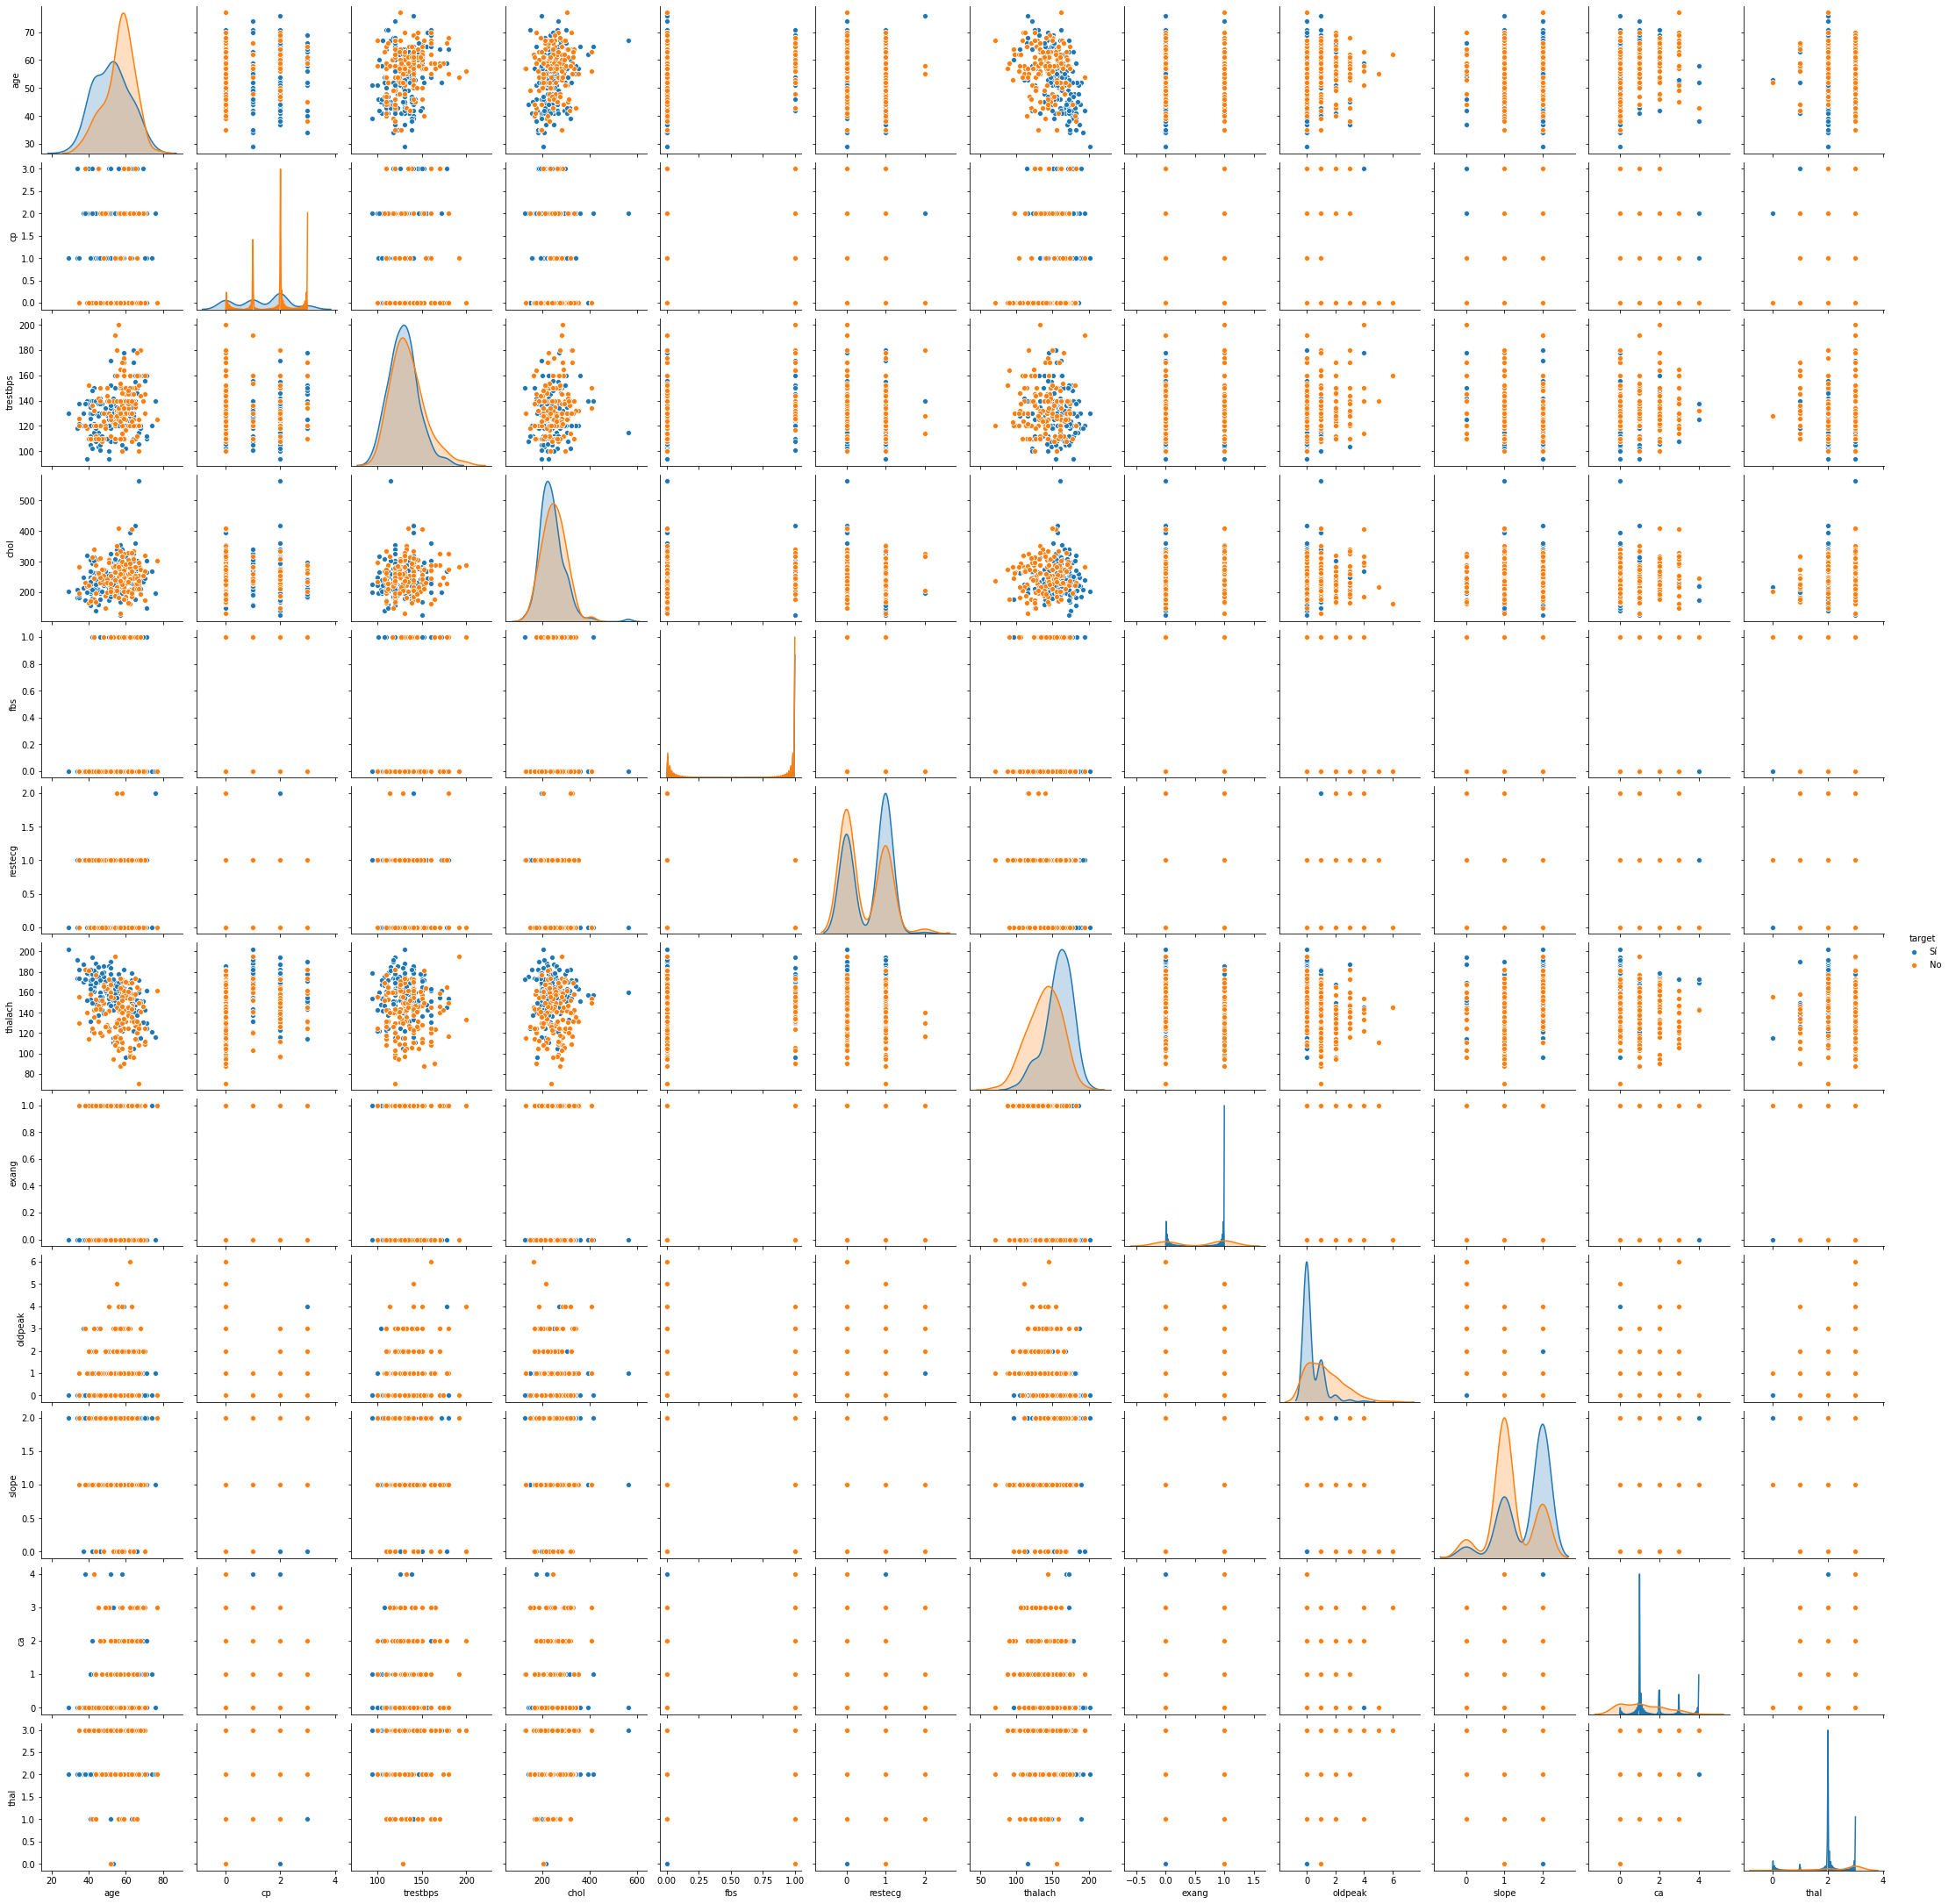

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot (cora, hue = 'target')
plt.show ()

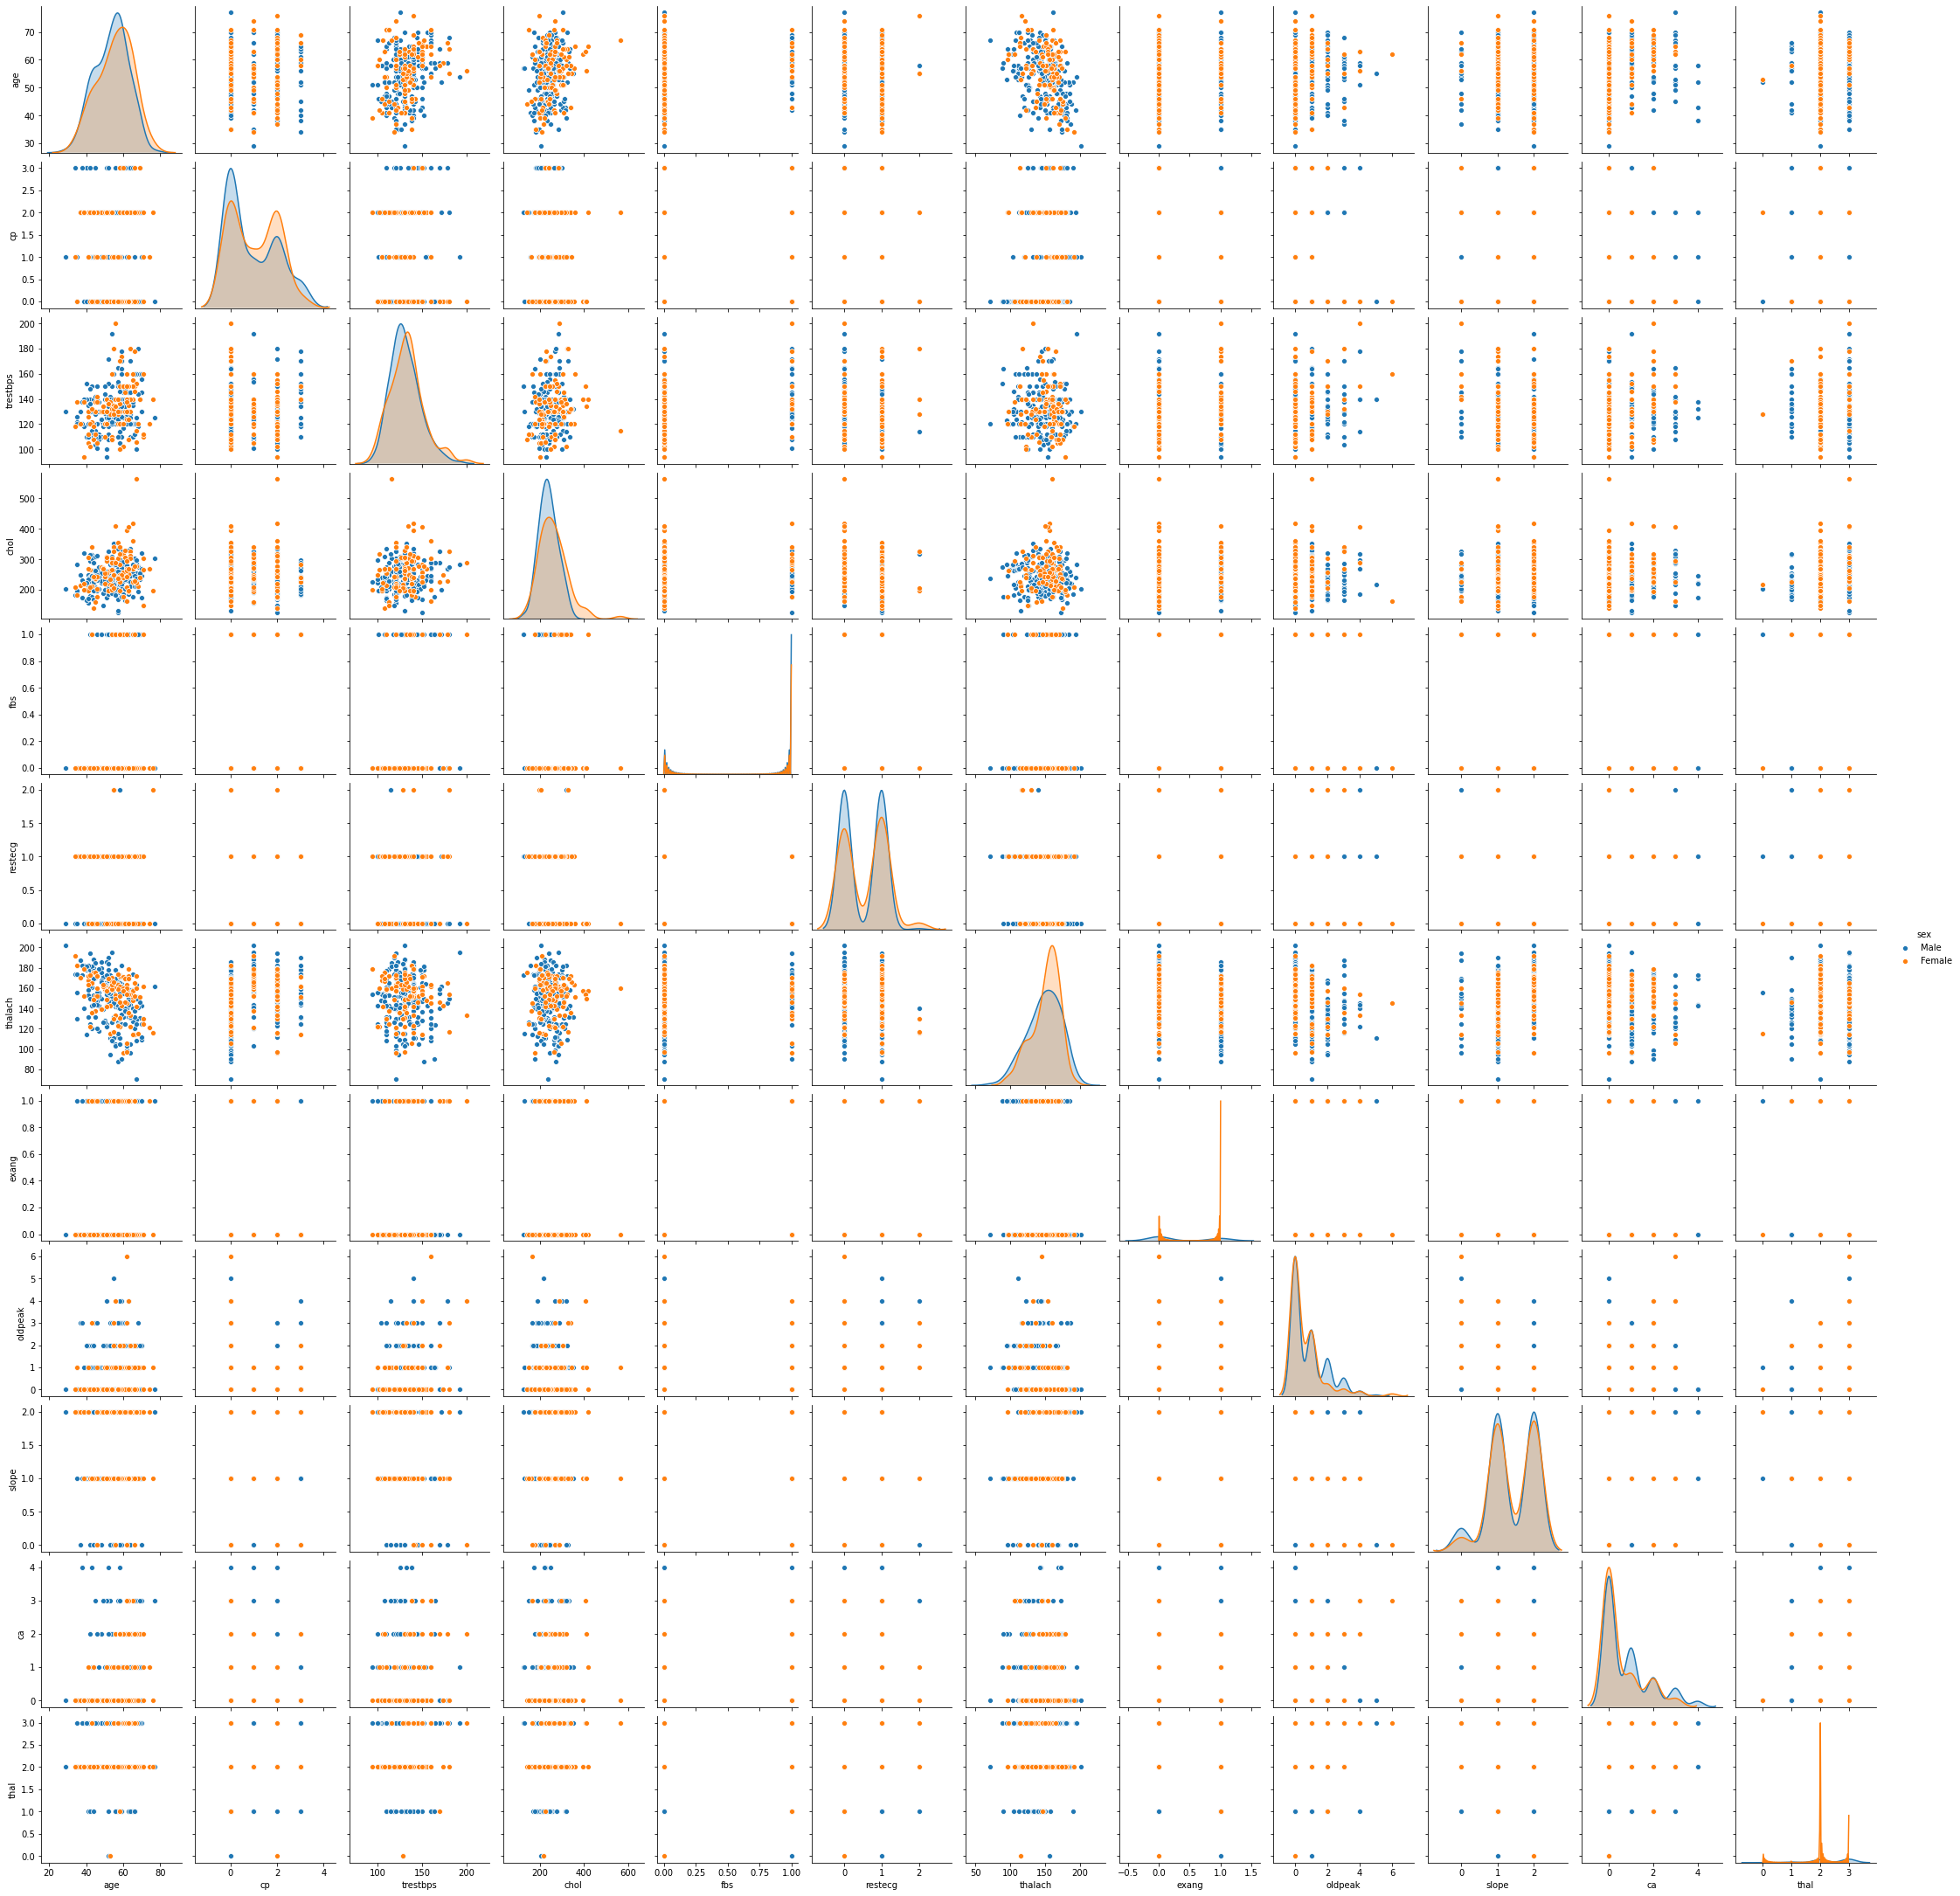

In [0]:
import seaborn as sns
sns.pairplot (cora, hue = 'sex')

Cuál sexo tiene mayor riesgo de padecer una cardiopatía?



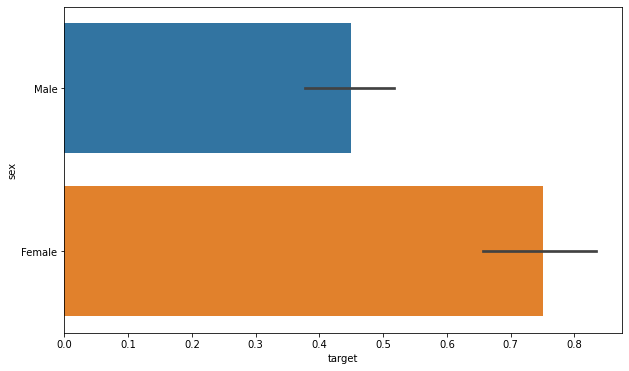

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="target", y="sex", data=cora)
plt.show()

Desde los 40 años en adelante se puede observar que aumentan los niveles de colesterol en la sangre

Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults.

A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

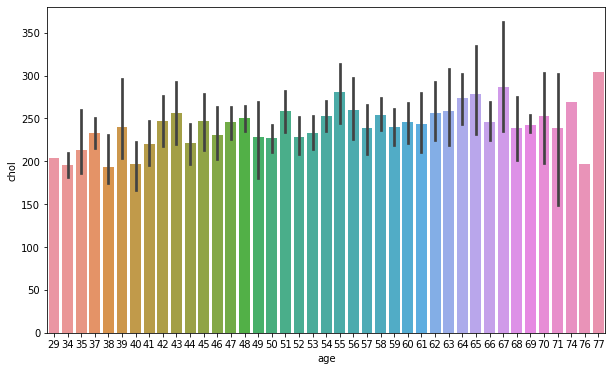

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="age", y="chol", data=cora)
plt.show()

Cuál sexo tiene mayor nivel de colesterol en la sangre por edad promedio?

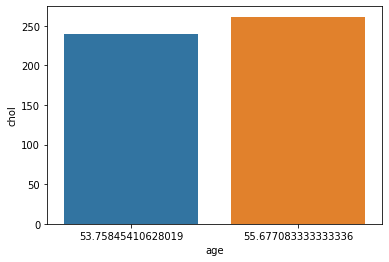

In [0]:
datasex= cora.groupby('sex').mean()
ax = sns.barplot(x="age", y="chol", data=datasex)

Correlación de los targets positivos con niveles de colesterol altos - muy altos por rangos de edad.

Hay un total de 118 personas con riesgo de padecer cardiopatía entre los 40-60 años


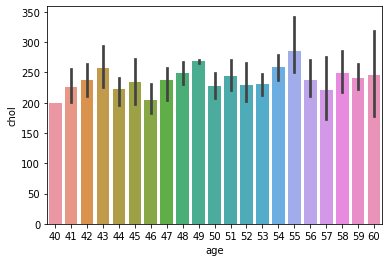

In [0]:
N40 = cora.loc[(cora['age']>=40) & (cora['age']<=60)& (cora['target']=='Sí') ].shape[0]
print('Hay un total de {} personas con riesgo de padecer cardiopatía entre los 40-60 años'.format(N40))

datage= cora.loc[(cora['age']>=40) & (cora['age']<=60)& (cora['target']=='Sí')]
ax = sns.barplot(x="age", y="chol", data=datage)

Hay un total de 90 personas sin riesgo de padecer cardiopatía entre los 40-60 años


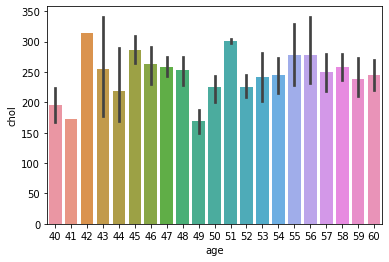

In [0]:
N40 = cora.loc[(cora['age']>=40) & (cora['age']<=60)& (cora['target']=='No') ].shape[0]
print('Hay un total de {} personas sin riesgo de padecer cardiopatía entre los 40-60 años'.format(N40))

datage= cora.loc[(cora['age']>=40) & (cora['age']<=60)& (cora['target']=='No')]
ax = sns.barplot(x="age", y="chol", data=datage)

Hay un total de 38 personas con riesgo de padecer cardiopatía mayores a 60 años


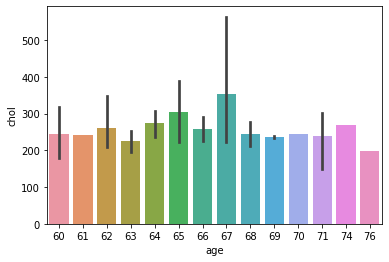

In [0]:
N60 = cora.loc[(cora['age']>=60)& (cora['target']=='Sí') ].shape[0]
print('Hay un total de {} personas con riesgo de padecer cardiopatía mayores a 60 años'.format(N60))

datage= cora.loc[(cora['age']>=60)& (cora['target']=='Sí') ]
ax = sns.barplot(x="age", y="chol", data=datage)

Hay un total de 52 personas sin riesgo de padecer cardiopatía mayores a 60 años


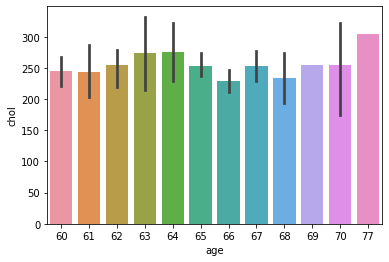

In [0]:
N60 = cora.loc[(cora['age']>=60)& (cora['target']=='No') ].shape[0]
print('Hay un total de {} personas sin riesgo de padecer cardiopatía mayores a 60 años'.format(N60))

datage= cora.loc[(cora['age']>=60)& (cora['target']=='No') ]
ax = sns.barplot(x="age", y="chol", data=datage)

Hay un total de 13 personas con riesgo de padecer cardiopatía menores a 40 años


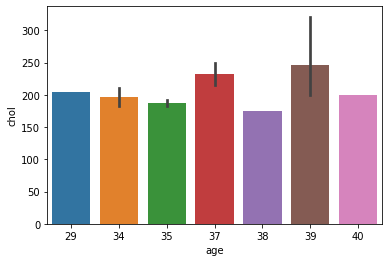

In [0]:
N29 = cora.loc[(cora['age']<=40)& (cora['target']=='Sí') ].shape[0]
print('Hay un total de {} personas con riesgo de padecer cardiopatía menores a 40 años'.format(N29))

datage= cora.loc[(cora['age']<=40)& (cora['target']=='Sí') ]
ax = sns.barplot(x="age", y="chol", data=datage)

Hay un total de 6 personas sin riesgo de padecer cardiopatía menores a 40 años


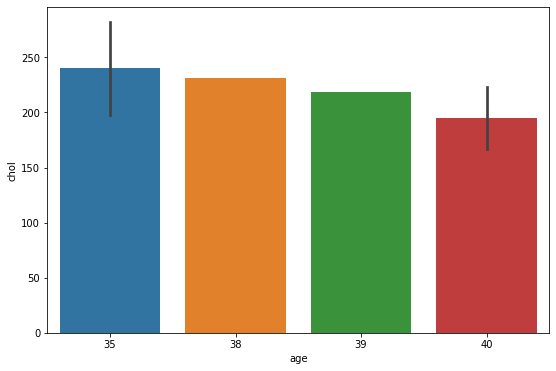

In [0]:
N29 = cora.loc[(cora['age']<=40)& (cora['target']=='No') ].shape[0]
print('Hay un total de {} personas sin riesgo de padecer cardiopatía menores a 40 años'.format(N29))

fig = plt.figure(figsize=(9,6))
datage= cora.loc[(cora['age']<=40)& (cora['target']=='No') ]
ax = sns.barplot(x="age", y="chol", data=datage)

El target positivo presenta nivel de colesterol más alto, mayores ritmos cardíacos, dolores en el pecho y la slope en el ST segment tiende a ser más flat lo que pudiera indicar alguna cardiopatía.

slope of the peak exercise ST segment on ECG (Value 1: ascending, Value 2: flat, Value 3: descending)

Interpretation:
The normal ST segment has a slight upward concavity.

Flat, downsloping, or depressed ST segments may indicate coronary ischemia.

ST elevation may indicate transmural myocardial infarction. 

ST depression may be associated with subendocardial myocardial infarction, hypokalemia, or digitalis toxicity.

In [0]:
cora.groupby('target').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,
No,56.601449,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.260870,1.166667,1.166667,2.543478
Sí,52.496970,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.351515,1.593939,0.363636,2.121212



Hay correlación positiva de una pendiente ascendente ó plana  cuando el paciente sobrepasa los 200 mg/dl deseables de colesterol en la sangre.

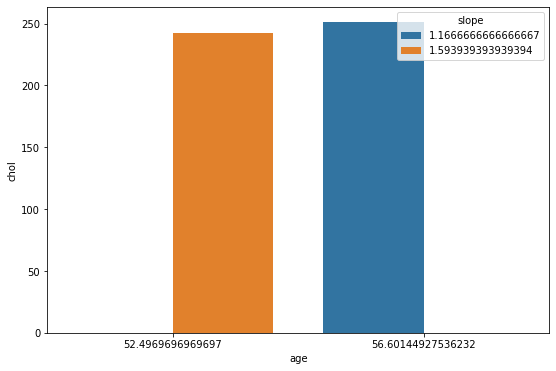

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

datatar = cora.groupby('target').mean ()
fig = plt.figure(figsize=(9,6))
ax = sns.barplot(x='age',y='chol',data=datatar,hue='slope')

In [0]:
cora.groupby('cp').mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
cp,,,,,,,,,,,
0,55.692308,132.020979,250.132867,0.125874,0.475524,140.538462,0.559441,1.097902,1.258741,0.965035,2.447552
1,51.360000,128.400000,244.780000,0.100000,0.620000,162.420000,0.080000,0.160000,1.680000,0.420000,2.140000
2,53.517241,130.379310,243.172414,0.195402,0.597701,155.609195,0.126437,0.517241,1.505747,0.586207,2.206897
3,55.869565,140.869565,237.130435,0.217391,0.391304,155.956522,0.173913,0.956522,1.260870,0.478261,2.260870


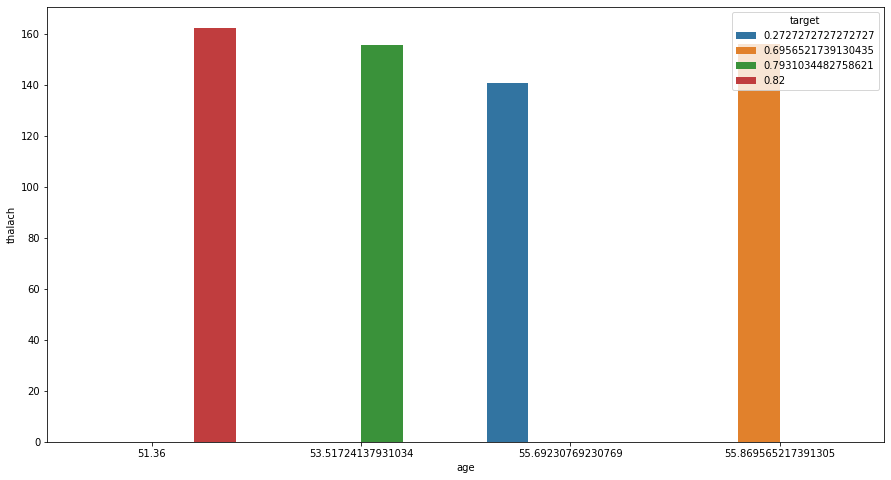

In [0]:
#thalach: ritmo cardíaco max

df = cora.groupby('cp').mean()
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x='age',y='thalach',data=df,hue='target')

# Análisis PCA

In [0]:
X = cora
y = cora['target'] 

In [0]:
cora.shape

(303, 14)

In [0]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decompositon:
from sklearn import decomposition
pca = decomposition.PCA(n_components=14).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:

XPCA = Xproj[:,0:3]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

varianza explicada acumulada =[ 23.58196631  34.81171469  43.61192179  52.23077113  59.53097862
  66.46075301  72.62671525  78.17023599  83.37876961  87.82677492
  91.64393416  94.71560291  97.37186101 100.        ]
Dimensionalidad datos en espacio PCA reducido = (303, 3)


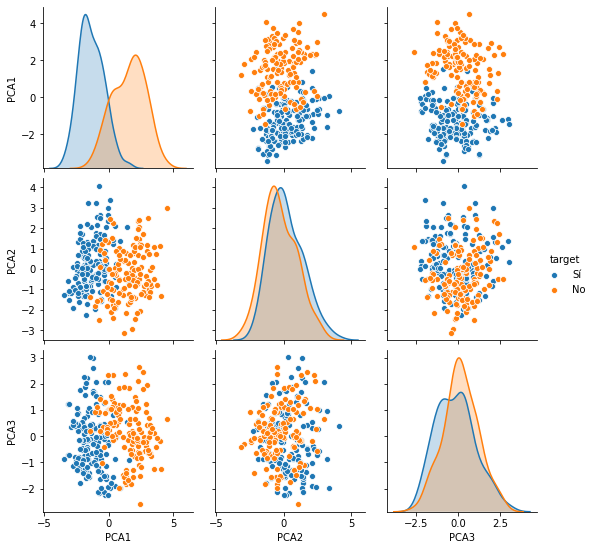

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3'])
d ['target']= y
sns.pairplot(d,hue= 'target')
plt.show()

#Análisis Eliminación Recursiva de Atributos

Elegir las dos variables que mejor permiten clasificar los datos en función de la etiqueta de clase escogida.

In [6]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE

svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Ranking of the features: {}'.format(rfe.ranking_))

Kept features: [False False False False False False False False False False False False
  True  True]
Ranking of the features: [ 9  6  5 12 13  4  3 11 10  7  8  2  1  1]


In [0]:
cora.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')